# Custom Indicator Example

In [20]:
import yfinance as yf

from mplchart.utils import get_info
from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, OHLC, Volume, LinePlot


In [21]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2019-12-19 00:00:00-05:00 to 2024-12-19 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1259 non-null   float64
 1   High          1259 non-null   float64
 2   Low           1259 non-null   float64
 3   Close         1259 non-null   float64
 4   Volume        1259 non-null   int64  
 5   Dividends     1259 non-null   float64
 6   Stock Splits  1259 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.7 KB


In [22]:
from mplchart.model import Indicator
from mplchart.library import get_series, calc_ema
from dataclasses import dataclass

class DEMA(Indicator, same_scale=True):
    """Double Exponential Moving Average"""

    def __init__(self, period: int = 20):
        self.period = period

    def __call__(self, prices):
        series = get_series(prices)
        ema1 = calc_ema(series, self.period)
        ema2 = calc_ema(ema1, self.period)
        return 2 * ema1 - ema2



In [23]:
dema20 = DEMA(20)
dema20


In [24]:
get_info(dema20, "same_scale")


True

In [25]:
vars(dema20)


{'period': 20}

In [26]:


res = DEMA(20)(prices)
res.tail()

Date
2024-12-13 00:00:00-05:00    246.436114
2024-12-16 00:00:00-05:00    247.837969
2024-12-17 00:00:00-05:00    249.457192
2024-12-18 00:00:00-05:00    249.834135
2024-12-19 00:00:00-05:00    250.500211
Name: close, dtype: float64

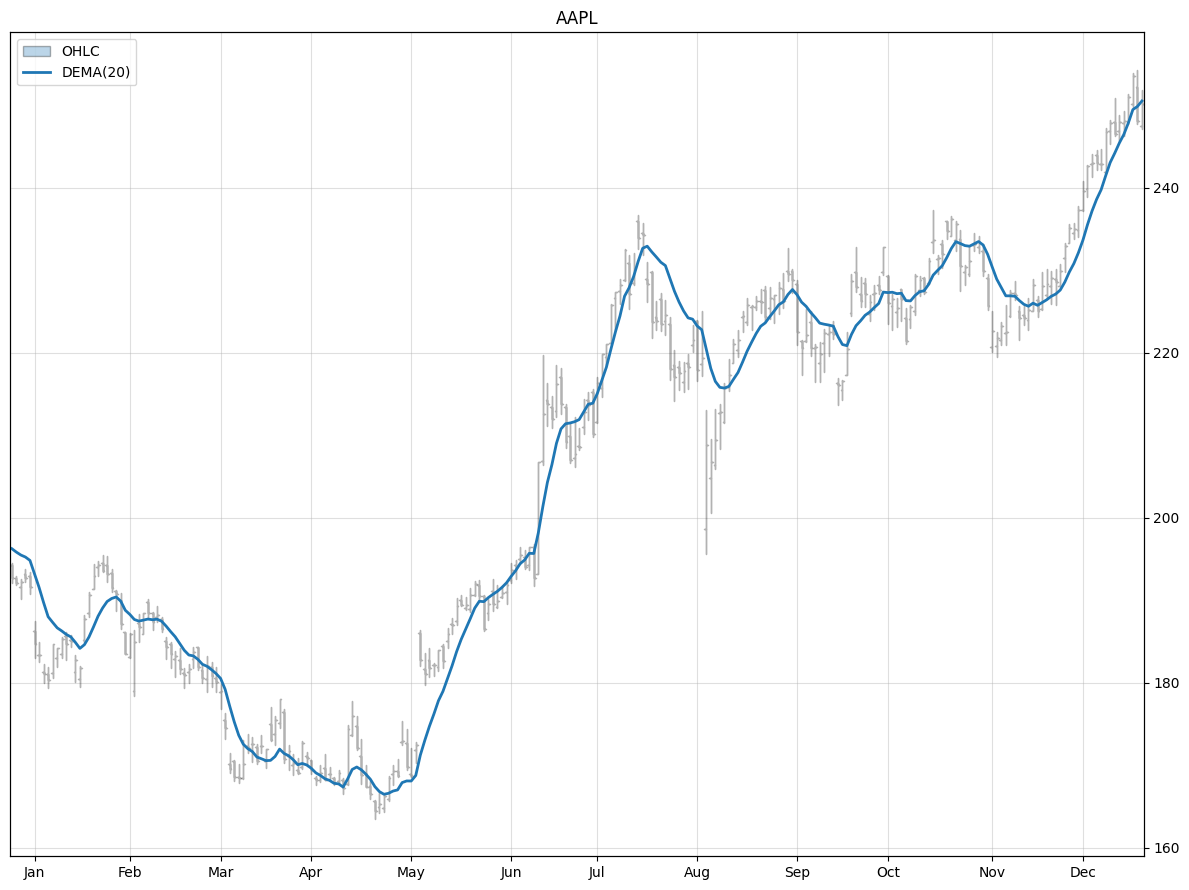

In [28]:
max_bars = 250

indicators = [
    OHLC(alpha=0.3),
    DEMA(20) | LinePlot(width=2),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)
